In [61]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [62]:
import numpy as np
from chainconsumer import ChainConsumer
#from corner import corner

In [63]:
! ls -lt /u/ki/swmclau2/des/PearceMCMC/*chain*cosmo*.npy

-rw-r--r-- 1 swmclau2 des 1962912063 Oct 22 14:39 /u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_3.npy
-rw-r--r-- 1 swmclau2 des 2760000063 Oct 21 22:57 /u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_2.npy
-rw-r--r-- 1 swmclau2 des 2760000063 Oct 19 23:50 /u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi.npy
-rw-r--r-- 1 swmclau2 des  276000063 Oct 18 21:34 /u/ki/swmclau2/des/PearceMCMC/200_walkers_5000_steps_chain_cosmo_zheng_xi.npy
-rw-r--r-- 1 swmclau2 des   27600063 Oct 18 15:02 /u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_cosmo_zheng_xi.npy
-rw-r--r-- 1 swmclau2 des    2760063 Oct 18 14:31 /u/ki/swmclau2/des/PearceMCMC/100_walkers_100_steps_chain_cosmo_zheng_xi.npy


In [64]:
! du /u/ki/swmclau2/des/PearceMCMC/*chain*cosmo*.npy -sh

2.6G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi.npy
2.6G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_2.npy
1.9G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_3.npy
27M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_cosmo_zheng_xi.npy
2.7M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_100_steps_chain_cosmo_zheng_xi.npy
264M	/u/ki/swmclau2/des/PearceMCMC/200_walkers_5000_steps_chain_cosmo_zheng_xi.npy


In [65]:
#fname = 'ab_sham_chain.npy'
#fname = '/u/ki/swmclau2/des/PearceMCMC/chain.npy'
fname = '/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_2.npy'

In [66]:
chain = np.genfromtxt(fname)

In [67]:
chain.shape

(10000000, 11)

In [68]:
n_walkers = 1000
n_params = chain.shape[1]

In [69]:
#c = chain.reshape((n_walkers, -1, n_params))
n_burn = 3000
chain = chain[n_walkers*n_burn:, :]
#c = chain.reshape((-1, n_walkers, n_params))

#chain = c[:,:, :].reshape((-1, n_params))
print chain.shape, chain.shape[0]/n_walkers

(7000000, 11) 7000


In [70]:
MAP = chain.mean(axis = 0)
print MAP

[ 3.25387988e+00  1.37561718e+01  1.34614240e+01  6.46909328e+01
 -7.73402497e-01  3.10806991e+00  1.10137861e-01  2.18344210e-01
  1.14661987e+00  9.50841808e-01  2.22574534e-02]


In [71]:
param_names = [r'$N_{eff}$', r'$\log(M_0)$',r'$\log(M_1)$', r'$H_0$',r'$w_0$', r'$\ln(10A_s)$',  r'$\Omega_c h^2$',
               r'$\sigma_{\log M }$', r'$\alpha$',  r'$n_s$', r'$\Omega_b h^2$']

In [72]:
hod_param_names = [r'$\sigma_{\log M }$', r'$\log(M_0)$',r'$\log(M_1)$',r'$\alpha$' ]
cosmo_param_names = [r'$\Omega_c h^2$',r'$\Omega_b h^2$',r'$\ln(10A_s)$',r'$n_s$', r'$H_0$',r'$N_{eff}$',r'$w_0$']

In [73]:
chain.shape

(7000000, 11)

In [74]:
#fixed some params
#param_names = [r'$\log{M_{min}}$',r'$\sigma_{log{M}}$',r'$\log{M_1}$', r'$\alpha$']#, r'$\log{M_0}$', r'$\log{M_1}$', r'$\alpha$']

In [75]:
c = ChainConsumer()
c.add_chain(chain, walkers=n_walkers, parameters = param_names)
c.configure(statistics='cumulative')

In [76]:
#true_vals = np.array([12.9390382,12.51024343,  14.36144524,   0.73766725,  1.06822384])
#true_vals = np.array([12.9390382,0.0, 12.51024343,  14.36144524, 0.0,  0.73766725,  1.06822384])

In [77]:
from pearce.mocks import cat_dict
cosmo_params = {'simname':'testbox', 'boxno': 3, 'realization':0, 'scale_factors':[1.0], 'system': 'long'}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [78]:
cpv = cat._get_cosmo_param_names_vals()

print  {key: val for key, val in zip(cpv[0], cpv[1])}

{'Neff': 3.7, 'H0': 70.7317, 'w0': -1.13151, 'omch2': 0.12283, 'ln10As': 3.11395, 'ns': 0.953515, 'ombh2': 0.0217629}


In [79]:
cosmo_true_vals = [0.12283, 0.021762, 3.11395, 0.953515, 70.7317, 3.7, -1.13151]

In [80]:
emulation_point = [('logM0', 14.0), ('sigma_logM', 0.2),
                    ('alpha', 1.083),('logM1', 13.7)]

In [81]:
hod_true_vals = [0.2, 14.0, 13.7, 1.083]

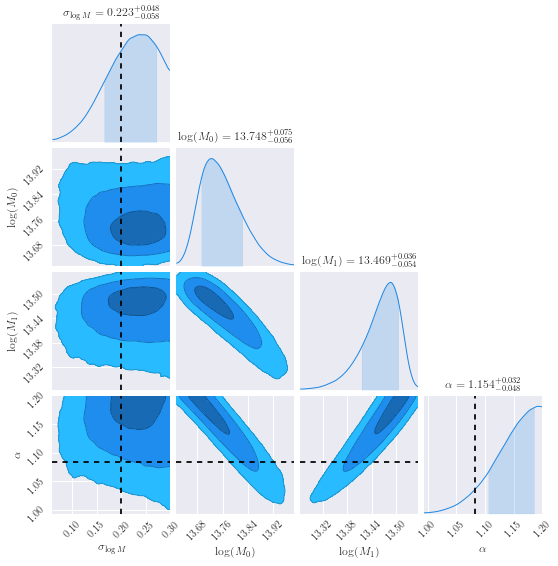

In [82]:
fig = c.plotter.plot(figsize=(8,8), parameters = hod_param_names, truth = hod_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

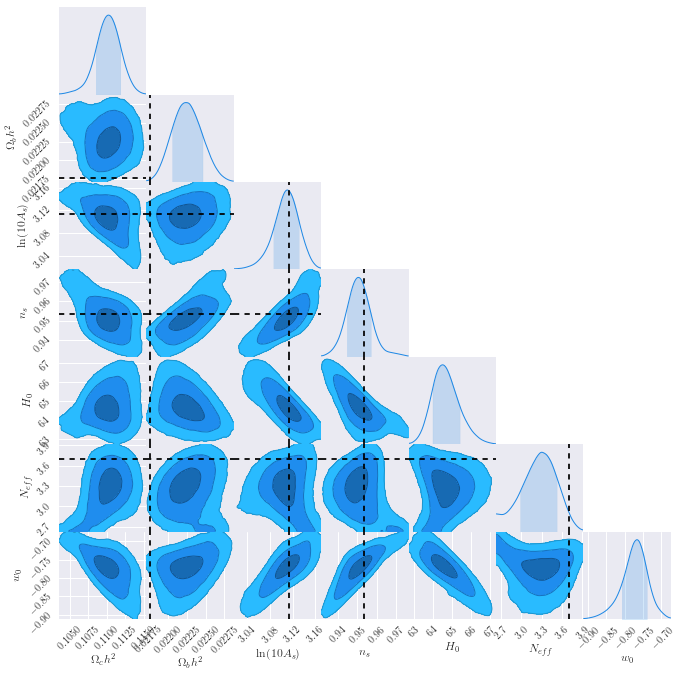

In [83]:
fig = c.plotter.plot(figsize=(10,10), parameters = cosmo_param_names, truth = cosmo_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

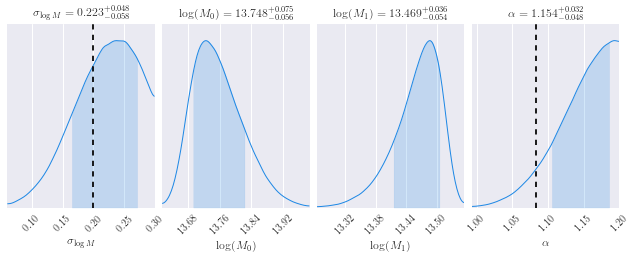

In [84]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 3) ,parameters = hod_param_names, truth = hod_true_vals)
fig.show()

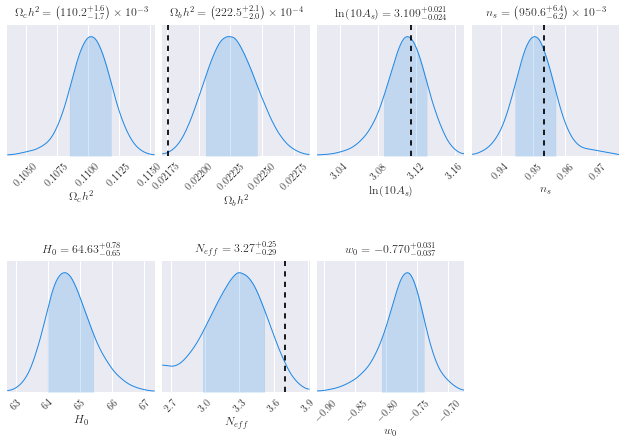

In [85]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 6) , parameters = cosmo_param_names, truth = cosmo_true_vals)
fig.show()

In [86]:
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print gelman_rubin_converged

Gelman-Rubin Statistic values for chain 0
$N_{eff}$: 1.00022 (Passed)
$\log(M_0)$: 1.00041 (Passed)
$\log(M_1)$: 1.00047 (Passed)
$H_0$: 1.00033 (Passed)
$w_0$: 1.00037 (Passed)
$\ln(10A_s)$: 1.00034 (Passed)
$\Omega_c h^2$: 1.00026 (Passed)
$\sigma_{\log M }$: 1.00042 (Passed)
$\alpha$: 1.00044 (Passed)
$n_s$: 1.00038 (Passed)
$\Omega_b h^2$: 1.00033 (Passed)
True


In [87]:
np.sqrt(np.diag(c.analysis.get_covariance()[1]))

array([2.62463923e-01, 6.45766337e-02, 4.65736944e-02, 7.27490541e-01,
       3.63949748e-02, 2.33891235e-02, 1.74921583e-03, 5.00823661e-02,
       3.95068648e-02, 6.80182958e-03, 1.97858731e-04])

In [88]:
summary  = c.analysis.get_summary()
for key, val in summary.iteritems():
    print key, val[1]

$\log(M_0)$ 13.747948870877941
$\ln(10A_s)$ 3.109427802310265
$\alpha$ 1.153892664934321
$n_s$ 0.9505922494556324
$\Omega_c h^2$ 0.1101937651230262
$w_0$ -0.7704961432677196
$N_{eff}$ 3.2720858212900885
$\sigma_{\log M }$ 0.22342266762667368
$\Omega_b h^2$ 0.022251987423341127
$H_0$ 64.63163004718483
$\log(M_1)$ 13.469364894995497


In [89]:
MAP = np.array([summary[p][1] for p in param_names])
print MAP

[ 3.27208582e+00  1.37479489e+01  1.34693649e+01  6.46316300e+01
 -7.70496143e-01  3.10942780e+00  1.10193765e-01  2.23422668e-01
  1.15389266e+00  9.50592249e-01  2.22519874e-02]


In [90]:
print param_names

['$N_{eff}$', '$\\log(M_0)$', '$\\log(M_1)$', '$H_0$', '$w_0$', '$\\ln(10A_s)$', '$\\Omega_c h^2$', '$\\sigma_{\\log M }$', '$\\alpha$', '$n_s$', '$\\Omega_b h^2$']
